# Analyzing the Cincinnati Bengals' Performance over Seasons

I didn't grow up in a Bengals house, let alone a football house, but as I've become more entrenched in the sport, as both a fan and a player, I've learned that history is an incredibly important part of a franchise. I'm highly aware of what the recent drafting of quarterback Joe Burrow has done for the Bengals, but have there been similar periods of success in the past?

My goal in completing this project was to analyze the Bengals' performance, not only before I became interested in football, but before I was even born, beginning in 1968 when the team joined the American Football League. I wanted to understand my team's history, visualizing its performance over the seasons, as well as identify certain factors that may have contributed to increased wins the way Burrow has in recent years.


### Importing libraries and the dataset 
The dataset for this project was dowloaded as a .csv file from pro-football-reference.com.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bengals = pd.read_csv('/kaggle/input/bengals/bengals.csv') 
bengals.head()

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,PD
0,2022,NFL,Cincinnati Bengals*,12,4,0,1st of 4,Lost Conf,418,322,96
1,2021,NFL,Cincinnati Bengals*,10,7,0,1st of 4,Lost SB,460,376,84
2,2020,NFL,Cincinnati Bengals,4,11,1,4th of 4,NaN,311,424,-113
3,2019,NFL,Cincinnati Bengals,2,14,0,4th of 4,NaN,279,420,-141
4,2018,NFL,Cincinnati Bengals,6,10,0,4th of 4,NaN,368,455,-87


### Pre-processing the dataset
Since this dataset was directly sourced from the Internet, there are a few issues that need to be taken care of before analyzing. 

In [3]:
# looking at the different variations of the team name
bengals.Tm.unique()

array(['Cincinnati Bengals*', 'Cincinnati Bengals'], dtype=object)

In [4]:
# standardizing the team name and confirming there is only 1 unique spelling now 
bengals['Tm'] = bengals['Tm'].replace('Cincinnati Bengals*','Cincinnati Bengals')
bengals.Tm.unique()

array(['Cincinnati Bengals'], dtype=object)

In [5]:
# confirming that all numerical columns are integer values. 
bengals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         55 non-null     int64 
 1   Lg           55 non-null     object
 2   Tm           55 non-null     object
 3   W            55 non-null     int64 
 4   L            55 non-null     int64 
 5   T            55 non-null     int64 
 6   Div. Finish  55 non-null     object
 7   Playoffs     16 non-null     object
 8   PF           55 non-null     int64 
 9   PA           55 non-null     int64 
 10  PD           55 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 4.9+ KB


### Creating a PCT Column 
In American football, PCT, or percentage, is a popular measurement of performance, as it indicates how many wins a team has in a season. It is simply calculated by dividing the amount of wins in a season by the total number of games played. In this analysis, PCT is used to measure and visualize Cincnnati's performance throughout the years. Since the dataset only contained Wins and Loses, a new column with the PCT calculation is created for each season.

In [6]:
# creating a column for PCT by calculating the Wins in a season dividied by the Wins and Loses of 
# that season (the total number of games played)
bengals['W-L%'] = bengals['W'] / (bengals['W']+bengals['L'])
bengals.head()

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,PD,W-L%
0,2022,NFL,Cincinnati Bengals,12,4,0,1st of 4,Lost Conf,418,322,96,0.750000
1,2021,NFL,Cincinnati Bengals,10,7,0,1st of 4,Lost SB,460,376,84,0.588235
2,2020,NFL,Cincinnati Bengals,4,11,1,4th of 4,NaN,311,424,-113,0.266667
3,2019,NFL,Cincinnati Bengals,2,14,0,4th of 4,NaN,279,420,-141,0.125000
4,2018,NFL,Cincinnati Bengals,6,10,0,4th of 4,NaN,368,455,-87,0.375000


### Calculating the PCT difference 
To find the largest increases in performance between two consecutive seasons, I will need to find the difference in W-L% between rows, and then create a new column with this information.

In [7]:
bengals['W-L% Difference'] = bengals['W-L%'].diff()
bengals.head()

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,PD,W-L%,W-L% Difference
0,2022,NFL,Cincinnati Bengals,12,4,0,1st of 4,Lost Conf,418,322,96,0.750000,NaN
1,2021,NFL,Cincinnati Bengals,10,7,0,1st of 4,Lost SB,460,376,84,0.588235,-0.161765
2,2020,NFL,Cincinnati Bengals,4,11,1,4th of 4,NaN,311,424,-113,0.266667,-0.321569
3,2019,NFL,Cincinnati Bengals,2,14,0,4th of 4,NaN,279,420,-141,0.125000,-0.141667
4,2018,NFL,Cincinnati Bengals,6,10,0,4th of 4,NaN,368,455,-87,0.375000,0.250000


In [8]:
# changing the negative values positive and vice versa
bengals['WL% Difference'] = bengals['W-L% Difference'].apply(lambda x: -x)

In [9]:
# dropping the extraneous difference column 
bengals = bengals.drop('W-L% Difference', axis=1)
bengals.head()

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,PD,W-L%,WL% Difference
0,2022,NFL,Cincinnati Bengals,12,4,0,1st of 4,Lost Conf,418,322,96,0.750000,NaN
1,2021,NFL,Cincinnati Bengals,10,7,0,1st of 4,Lost SB,460,376,84,0.588235,0.161765
2,2020,NFL,Cincinnati Bengals,4,11,1,4th of 4,NaN,311,424,-113,0.266667,0.321569
3,2019,NFL,Cincinnati Bengals,2,14,0,4th of 4,NaN,279,420,-141,0.125000,0.141667
4,2018,NFL,Cincinnati Bengals,6,10,0,4th of 4,NaN,368,455,-87,0.375000,-0.250000


### Finding the largest increases in performance 
Now that PCT and PCT differences between seasons have been calculated, I can find seasons where there were the greatest increases in performance. I am going to calculate the five largest PTC increases through franchise history. 

In [10]:
top_5 = bengals['WL% Difference'].nlargest(5)
# finding the five largest values

In [11]:
rows_with_top5_values = bengals[bengals['WL% Difference'].isin(top_5)]
# grabbing the rows with the top five values, so I can also see the season years

# Printing the result
print("Top 5 Values:")
print(top_5)

print("Rows with Top 5 Values:")
print(rows_with_top5_values)

Top 5 Values:
35    0.483333
20    0.375000
42    0.375000
14    0.358333
2     0.321569
Name: WL% Difference, dtype: float64
Rows with Top 5 Values:
    Year   Lg                  Tm  W   L  T Div. Finish Playoffs   PF   PA  \
2   2020  NFL  Cincinnati Bengals  4  11  1    4th of 4      NaN  311  424   
14  2008  NFL  Cincinnati Bengals  4  11  1    3rd of 4      NaN  204  364   
20  2002  NFL  Cincinnati Bengals  2  14  0    4th of 4      NaN  279  456   
35  1987  NFL  Cincinnati Bengals  4  11  0    4th of 4      NaN  285  370   
42  1980  NFL  Cincinnati Bengals  6  10  0    4th of 4      NaN  244  312   

     PD      W-L%  WL% Difference  
2  -113  0.266667        0.321569  
14 -160  0.266667        0.358333  
20 -177  0.125000        0.375000  
35  -85  0.266667        0.483333  
42  -68  0.375000        0.375000  


### A Note on Seasons and Years  
Like with academic school years, a given NFL season spans portions of two calander years. For example, in this dataset, year 2020 in a row refers to the 2020-2021 season, which began in September 2020 and ended in January 2021. 

2020 was found to have one of the largest PCT differences between season, which means that the increase occured between the 2020-21 season and the 2021-22 season. 

For clarity, the four additional largest increases in PCT were from: 2008-2009 to 2009-2010, 2002-2003 to 2003-2004, 1987-1988 to 1988-1987, and 1980-81 to 1981-1982. 

### Visualizing Bengals' History 

With the dataset cleaned, PCT and PCT difference calculated, and top five PCT positive differences found, it's now time to create a visualization.

The PCT across franchise history is plotted, with the five PCT positive differences as found above, highlighted in green.

I then looked into these five seasons and tried to identify possible reasons for the increases, annotating them on the plot. There are a multitude of factors that go into an NFL's performance in a season. For example, a draft pick in one season may not cause a positive difference the next year, but perhaps three years later. While this plot doesn't intend to suggest that a single reason alone had the capability to increase Cincinnati's wins the next season, it does intend to provide illumination into the team's performance, and contextualize the numerical analysis with historical information.  

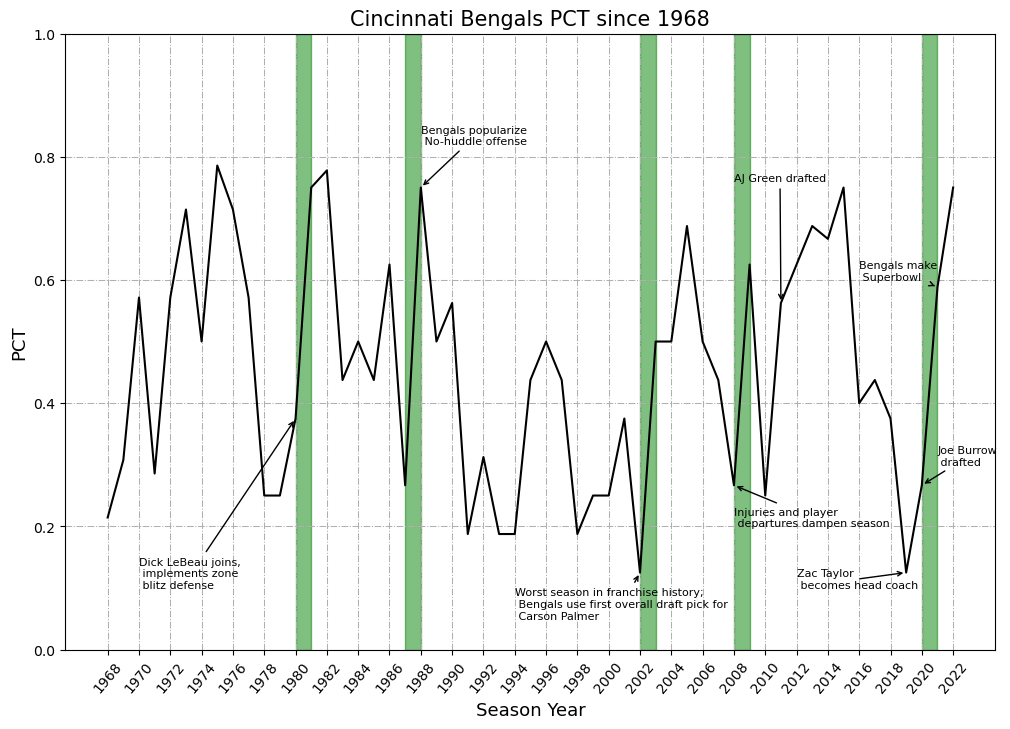

In [12]:
plt.rcParams['figure.figsize'] = [12, 8]

plt.title('Cincinnati Bengals PCT since 1968', fontsize = 15)

plt.xlabel('Season Year', fontsize = 13)

plt.ylabel('PCT', fontsize = 13)

plt.annotate('Joe Burrow \n drafted', xy=(2020, 0.266667), xytext=(2021, 0.3), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Zac Taylor \n becomes head coach', xy=(2019, 0.125000), xytext=(2012, 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Bengals make \n Superbowl', xy=(2021, 0.588235), xytext=(2016, 0.6), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Injuries and player \n departures dampen season', xy=(2008, 0.266667), xytext=(2008, 0.2), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Worst season in franchise history; \n Bengals use first overall draft pick for \n Carson Palmer ', 
             xy=(2002, 0.125000), xytext=(1994, 0.05), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Bengals popularize \n No-huddle offense', xy=(1988, 0.75), xytext=(1988, 0.82),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('Dick LeBeau joins, \n implements zone \n blitz defense', 
             xy=(1980, 0.375000), xytext=(1970, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

plt.annotate('AJ Green drafted', 
             xy=(2011, 0.562500), xytext=(2008, 0.76),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)

color_regions = [(2020, 2021), (2008, 2009), (2002, 2003), (1987, 1988), (1980, 1981)]

for region in color_regions:
    plt.axvspan(region[0], region[1], color='green', alpha=0.5)

plt.plot(bengals['Year'], bengals['W-L%'], color = 'black')

plt.ylim(0,1) #for setting y limits from 0 to 1 (since percentage)

plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) 

plt.xticks(bengals['Year'][::2], rotation = 50)

plt.savefig('plot.jpg', format='jpeg')
#plt.figure(figsize=(10, 10))

plt.show()

### Final Thoughts 

Before I became properly interested in football, my understanding was that the Bengals were a team of mediocrity – not quite the worst, but certainly not the best, or even that close to good. When I embarked on this project, I was expecting to see season after season of few wins, and then a sudden, meteoric rise in PCT after 2020 with the drafting of Joe Burrow.

I was pleasantly surprised to discover that this was not the case, and that in fact, the Bengals’ PCT since 1968 looks less like a rollarcoaster's descent, and more like a heart monitor reading. Like most teams in the NFL, and like with most teams across all sports, good fortune comes, and then it goes. Players and coaches are constantly shifting, altering the chemistry of a team at every opportunity. A team can go from playing excellent to horrible between seasons, or even between games mere weeks apart from each other.

While it's true the Bengals have endured its fair share of lingering heartbreak, this project illuminated certain periods of prosperity and good fortune. In an effort to provide context to the PCT history, I even learned about personnel and operational changes that played an important role in the team performance. (As someone who has played on a no-huddle offense team, I can appreciate the Bengal's utilization of it). What struck me in particular, though, was how short-lived these prosperous instances were throughout Bengals history. For example, the largest PCT increase was from the 1987 to 1988 season, but the following 1989 season saw a distinct fall in wins, ushering in a period of lackluster performance throughout the 1990's.

Perhaps what makes the recent success of the franchise so exciting is the seeming longevity of it all. From a record low PCT in 2019, the Bengals have since seen a steady increase in PCT, most famously through their Super Bowl run in 2021, and then their finish in the AFC Championship in the recent 2022 season.

It is my hope that the Burrow/Chase/Taylor era continues to shine, because based on the Bengals' history, what is most needed, and has been most lacking, is not just success, but sustainability.

